In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bloodpressure-dct-vs-self/BloodPressure.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = '/kaggle/input/bloodpressure-dct-vs-self/BloodPressure.csv'
df = pd.read_csv(path, index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 353
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   patient   354 non-null    int64
 1   age       354 non-null    int64
 2   sex       354 non-null    int64
 3   drgs      354 non-null    int64
 4   dm        354 non-null    int64
 5   tabag     354 non-null    int64
 6   mapa      354 non-null    int64
 7   sist_p1   354 non-null    int64
 8   diast_p1  354 non-null    int64
 9   sist_p2   354 non-null    int64
 10  diast_p2  354 non-null    int64
 11  sist_p3   354 non-null    int64
 12  diast_p3  354 non-null    int64
 13  sist_m1   354 non-null    int64
 14  diast_m1  354 non-null    int64
 15  sist_m2   354 non-null    int64
 16  diast_m2  354 non-null    int64
dtypes: int64(17)
memory usage: 49.8 KB


In [5]:
df.describe()

,patient,age,sex,drgs,dm,tabag,mapa,sist_p1,diast_p1,sist_p2,diast_p2,sist_p3,diast_p3,sist_m1,diast_m1,sist_m2,diast_m2
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.00000,354.000000,354.000000,354.000000
mean,8820.166667,55.019774,1.500000,0.553672,0.118644,0.053672,0.234463,136.779661,79.330508,132.533898,79.025424,131.590395,78.884181,134.79096,76.302260,133.887006,76.104520
std,3788.680103,16.467055,0.500708,0.497815,0.323827,0.225689,0.424263,19.313048,12.355720,17.709498,11.791480,17.295106,11.992001,18.02772,11.672667,18.392747,11.700601
min,87.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,80.000000,43.000000,85.000000,49.000000,88.000000,48.000000,92.00000,50.000000,94.000000,46.000000
25%,6412.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,124.000000,71.000000,120.000000,71.000000,119.000000,70.000000,122.00000,68.000000,122.000000,68.000000
50%,10326.000000,56.000000,1.500000,1.000000,0.000000,0.000000,0.000000,135.000000,78.000000,131.000000,78.000000,130.000000,78.000000,132.00000,76.000000,132.000000,76.000000
75%,12252.750000,67.750000,2.000000,1.000000,0.000000,0.000000,0.000000,148.000000,87.000000,143.750000,86.000000,142.000000,86.000000,146.00000,84.000000,146.000000,84.000000
max,12465.000000,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,199.000000,118.000000,192.000000,119.000000,209.000000,114.000000,220.00000,116.000000,208.000000,120.000000


In [6]:
df

,patient,age,sex,drgs,dm,tabag,mapa,sist_p1,diast_p1,sist_p2,diast_p2,sist_p3,diast_p3,sist_m1,diast_m1,sist_m2,diast_m2
0,87,78,1,0,0,0,1,124,86,119,74,118,73,110,70,102,68
1,161,90,2,1,1,1,0,132,80,143,91,144,90,130,72,134,70
2,225,73,1,1,1,0,0,132,69,112,65,115,71,138,60,140,62
3,227,39,1,0,0,0,0,132,75,110,82,112,88,120,80,114,80
4,287,65,1,1,0,0,0,140,73,153,80,157,75,154,66,154,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,4195,56,1,0,0,0,1,148,76,133,85,130,73,140,64,134,70
350,3063,76,1,1,0,0,1,154,61,150,62,136,59,146,58,138,68
351,2864,52,2,0,0,0,1,147,91,142,94,148,95,164,92,172,88
352,1570,55,2,1,0,0,1,140,96,137,91,145,99,138,90,134,90


In [7]:
df.nunique()

patient     325
age          73
sex           2
drgs          2
dm            2
tabag         2
mapa          2
sist_p1      85
diast_p1     57
sist_p2      81
diast_p2     56
sist_p3      73
diast_p3     57
sist_m1      44
diast_m1     31
sist_m2      48
diast_m2     32
dtype: int64

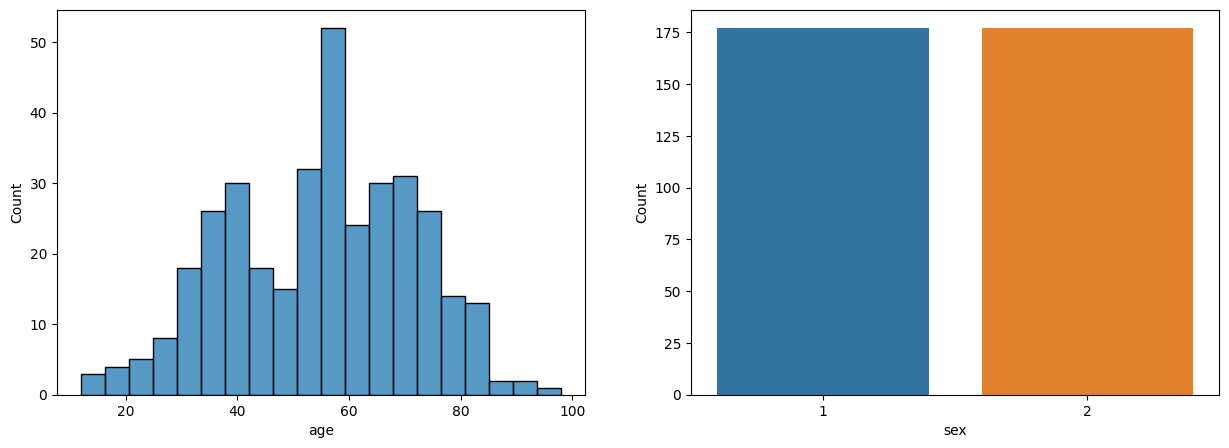

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=df, x="age", bins=20, ax=ax1)
sns.countplot(data=df, x="sex", ax=ax2)
ax2.set_ylabel("Count")
plt.show();